In [8]:
gasolina <- get_series(c(Consumo = 1393), start_date = "2003-02-01", end_date = "2020-02-01")
ibc <- get_series(c(IBC = 24364), end_date = "2020-02-01")
alcool <- get_series(c(Consumo = 1401), start_date = "2003-02-01", end_date = "2020-02-01")

In [9]:
var_ibc <- (diff(ibc$IBC, 1)/ibc$IBC[1:length(ibc$IBC)-1])
var_ibc <- cumprod((1+var_ibc))-1

In [10]:
preco <- get_series(c(Preço = 4458), start_date = "2003-02-01")
preco$Preço <- cumprod((1+(preco$Preço/100)))-1
preco_renda <- ((1+preco$Preço)/(1+var_ibc))*271

In [11]:
gaso_seas <- seas(ts(gasolina$Consumo, start = c(2003,02), frequency = 12))
gaso_seas1 <- data.frame(gaso_seas$data)$final
gaso_seas1 <- data.frame(Data = gasolina$date, Consumo = gaso_seas1)

In [12]:
pop <- 180708*(1.00074)^(1:205)

In [13]:
alcool_saz <- seas(ts(alcool$Consumo, start = c(2003,02), frequency = 12))
alcool_saz1 <- data.frame(alcool_saz$data)$final

In [14]:
consumo_preco <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool$Consumo*100000/pop)

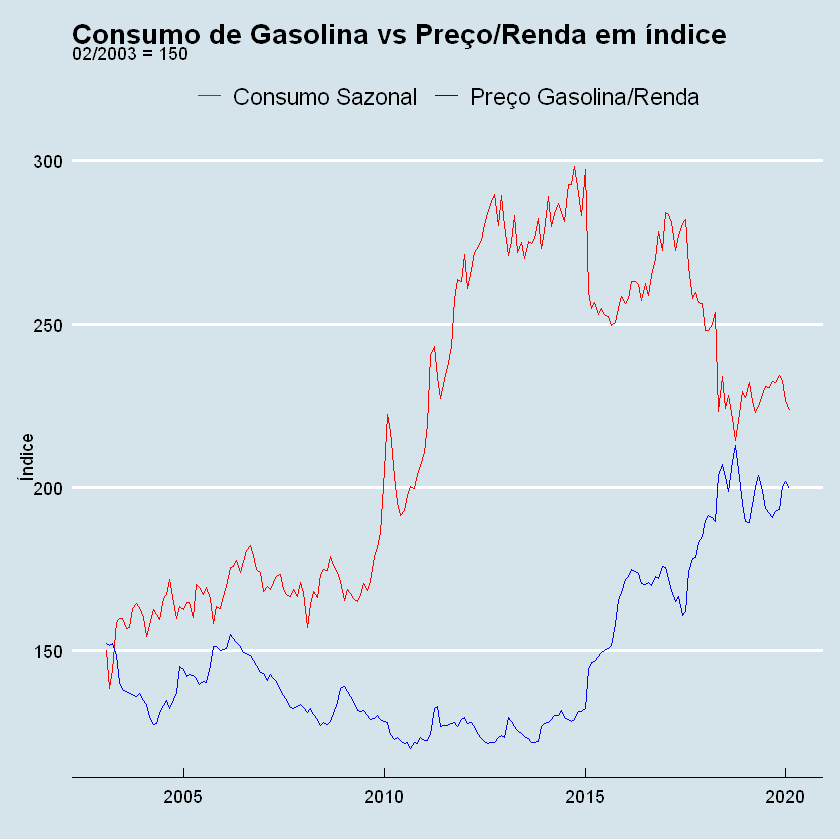

In [15]:
ggplot(consumo_preco, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal"))+
  geom_line(aes(y = Preco_Renda, col ="Preço Gasolina/Renda"))+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Preço/Renda em índice",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal" = "red",
                                     "Preço Gasolina/Renda" = "blue"))+
  theme_economist()

In [16]:
consumo2 <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool_saz1*100000/pop)

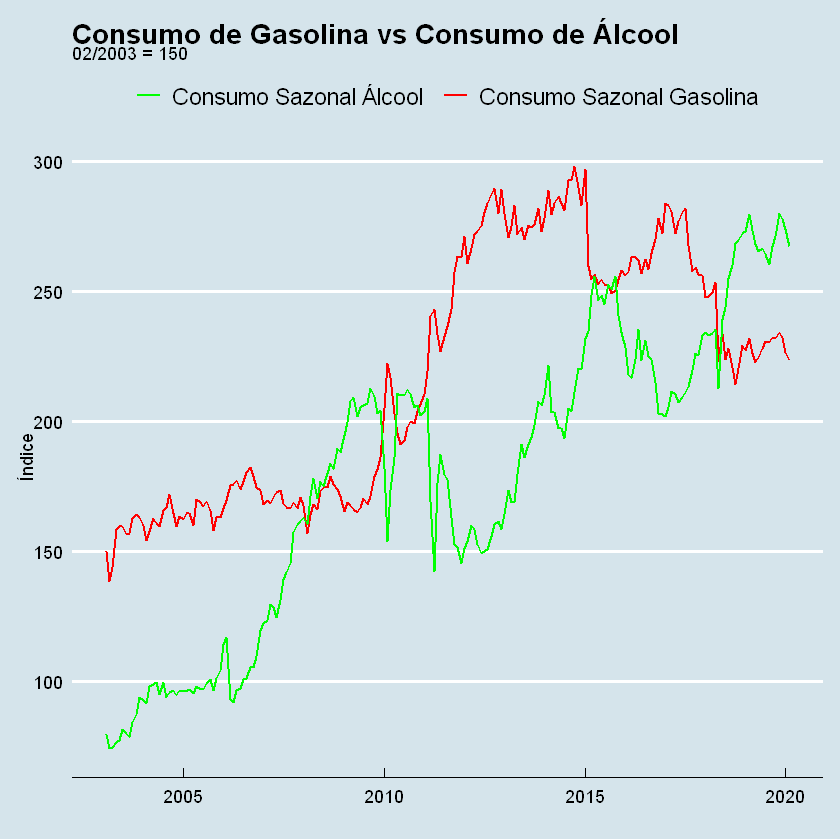

In [21]:
ggplot(consumo2, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal Gasolina"), size = 0.7)+
  geom_line(aes(y = Consumo_Alcool, col = "Consumo Sazonal Álcool"), size = 0.7)+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Consumo de Álcool",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal Gasolina" = "red",
                                     "Consumo Sazonal Álcool" = "green"))+
  theme_economist()